In [1]:
import pathlib

import torch
import torch.utils.data

from torchvision import models, datasets, tv_tensors
from torchvision.transforms import v2

torch.manual_seed(22)

# This loads fake data for illustration purposes of this example. In practice, you'll have
# to replace this with the proper data.
# If you're trying to run that on collab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
ROOT = pathlib.Path("../data")
IMAGES_PATH = str(ROOT / "train")
ANNOTATIONS_PATH = str(ROOT / "annotations_qualitex_reviewed_19_03_2024.json")
from helpers import plot

In [2]:
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)

sample = dataset[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{type(target[0]) = }\n{target[0].keys() = }")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
type(img) = <class 'PIL.Image.Image'>
type(target) = <class 'list'>
type(target[0]) = <class 'dict'>
target[0].keys() = dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [3]:
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=("boxes", "labels", "masks"))

sample = dataset[2]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }\n{type(target['masks']) = }")

type(img) = <class 'PIL.Image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'masks', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>
type(target['masks']) = <class 'torchvision.tv_tensors._mask.Mask'>


<class 'torch.Tensor'>


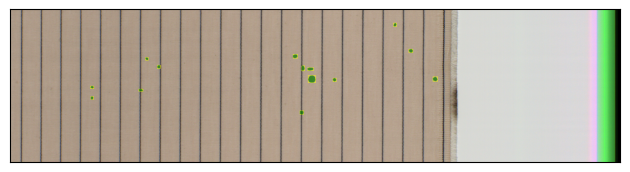

In [4]:
plot([dataset[2]])

In [9]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.5),
        v2.RandomVerticalFlip(p=0.5),
        v2.Resize((1024, 1024)),
        v2.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
        v2.ToTensor(),
    ]
)

/home/ubuntu/.local/share/virtualenvs/aqc-textilesam-vPgt_Wla/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [10]:
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH, transforms=transforms)
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=["boxes", "labels", "masks"])

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [11]:
sample = dataset[2]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }\n{type(target['masks']) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'masks', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>
type(target['masks']) = <class 'torchvision.tv_tensors._mask.Mask'>


<class 'torchvision.tv_tensors._image.Image'>


TypeError: Input can either be a pure Tensor, a numpy array, or a PIL image, but got <class 'dict'> instead.

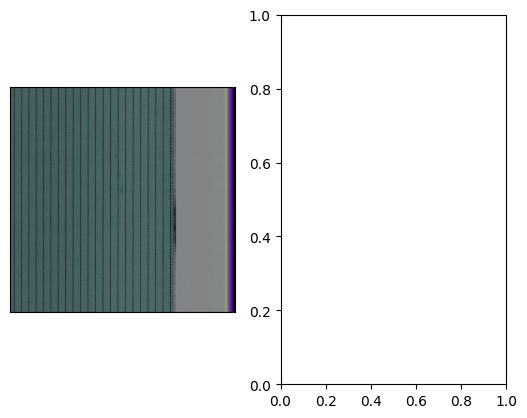

In [23]:
plot(sample)